In [1]:
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [2]:
df = pd.read_csv("../../data/master.csv")
df.sort_values(['Developing','country', 'year'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,ISO,country,year,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,"Gross domestic product per capita, current prices",Unemployment rate,Population,...,obese_children_prevalence_SEX_BTSX_AGEGROUP_YEARS10-19,underweight_adults_prevalence_SEX_FMLE,underweight_adults_prevalence_SEX_BTSX,underweight_adults_prevalence_SEX_MLE,overweight_adults_prevalence_SEX_BTSX,overweight_adults_prevalence_SEX_MLE,overweight_adults_prevalence_SEX_FMLE,obese_adults_prevalence_SEX_BTSX,obese_adults_prevalence_SEX_MLE,obese_adults_prevalence_SEX_FMLE
0,AND,Andorra,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.37391,3.41026,2.33471,1.33829,48.91428,55.52637,41.77706,14.57424,14.48056,14.67537
1,AND,Andorra,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.62680,3.38228,2.30707,1.30840,49.39171,56.21318,42.04741,14.98061,15.06607,14.88860
2,AND,Andorra,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.85746,3.40481,2.31059,1.29644,49.57156,56.60038,41.98778,15.26287,15.53899,14.96495
3,AND,Andorra,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.10634,3.41720,2.30555,1.27860,49.79273,57.03399,41.95425,15.55417,16.01800,15.05208
4,AND,Andorra,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.37555,3.41692,2.29094,1.25449,50.05269,57.51136,41.94971,15.85633,16.50580,15.15076


In [3]:
df.columns

Index(['ISO', 'country', 'year', 'yr_sch', 'yr_sch_pri', 'yr_sch_sec',
       'yr_sch_ter', 'Gross domestic product per capita, current prices',
       'Unemployment rate', 'Population', 'General government revenue',
       'General government total expenditure',
       'General government net lending/borrowing',
       'General government primary net lending/borrowing',
       'General government gross debt', 'Current account balance',
       'Developing', 'life_expectancy_at_birth_SEX_MLE',
       'life_expectancy_at_birth_SEX_BTSX',
       'life_expectancy_at_birth_SEX_FMLE', 'bcg_immunization_coverage',
       'dtp_immunization_coverage', 'hepb3_immunization_coverage',
       'hib3_immunization_coverage', 'hpv_immunization_coverage',
       'mcv1_immunization_coverage', 'mcv2_immunization_coverage',
       'pab_immunization_coverage', 'pcv3_immunization_coverage',
       'pol3_immunization_coverage', 'rotac_immunization_coverage',
       'hiv_prevalence', 'new_hiv_per_1000', 'malar

### Initial Removal
- Removed columns that are subsets of other columns (guranteed collinearity)
- Removed columns with really weak correlation (mostly govt variables)
- Removed columns with LARGE amount of missing data

In [4]:
df_filtered = df[['ISO', 'country', 'year', 'yr_sch', 'Gross domestic product per capita, current prices',
       'Unemployment rate', 'Population', 
       'Developing', 
       'life_expectancy_at_birth_SEX_BTSX', 'bcg_immunization_coverage',
       'dtp_immunization_coverage', 'hepb3_immunization_coverage',
       'hib3_immunization_coverage', 'hpv_immunization_coverage',
       'mcv1_immunization_coverage', 'mcv2_immunization_coverage',
       'pab_immunization_coverage', 'pcv3_immunization_coverage',
       'pol3_immunization_coverage', 'rotac_immunization_coverage',
       'hiv_prevalence', 'new_hiv_per_1000', 'malaria_per_1000',
       'gghe-d_%_of_che', 
       'alc_consump_per_capita_liters_SEX_BTSX',
       'preterm_birth_rate_per_100',
       'low_birth_weight_prevalence',
       'pregnant_women_anaemia_prevalence_SEVERITY_TOTAL',
       'pregnant_women_mean_hemoglobin',
       'children_anaemia_prevalence_SEVERITY_TOTAL',
       'children_mean_hemoglobin',
       'thin_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19',
       'overweight_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19',
       'obese_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19',
       'underweight_adults_prevalence_SEX_BTSX',
       'overweight_adults_prevalence_SEX_BTSX',
       'obese_adults_prevalence_SEX_BTSX']].copy()

/var/folders/97/23ltc4v96g31pp78_gyv6dvm0000gn/T/ipykernel_42572/1067050137.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pca_df['PC1'][i], pca_df['PC2'][i], label, fontsize=9)


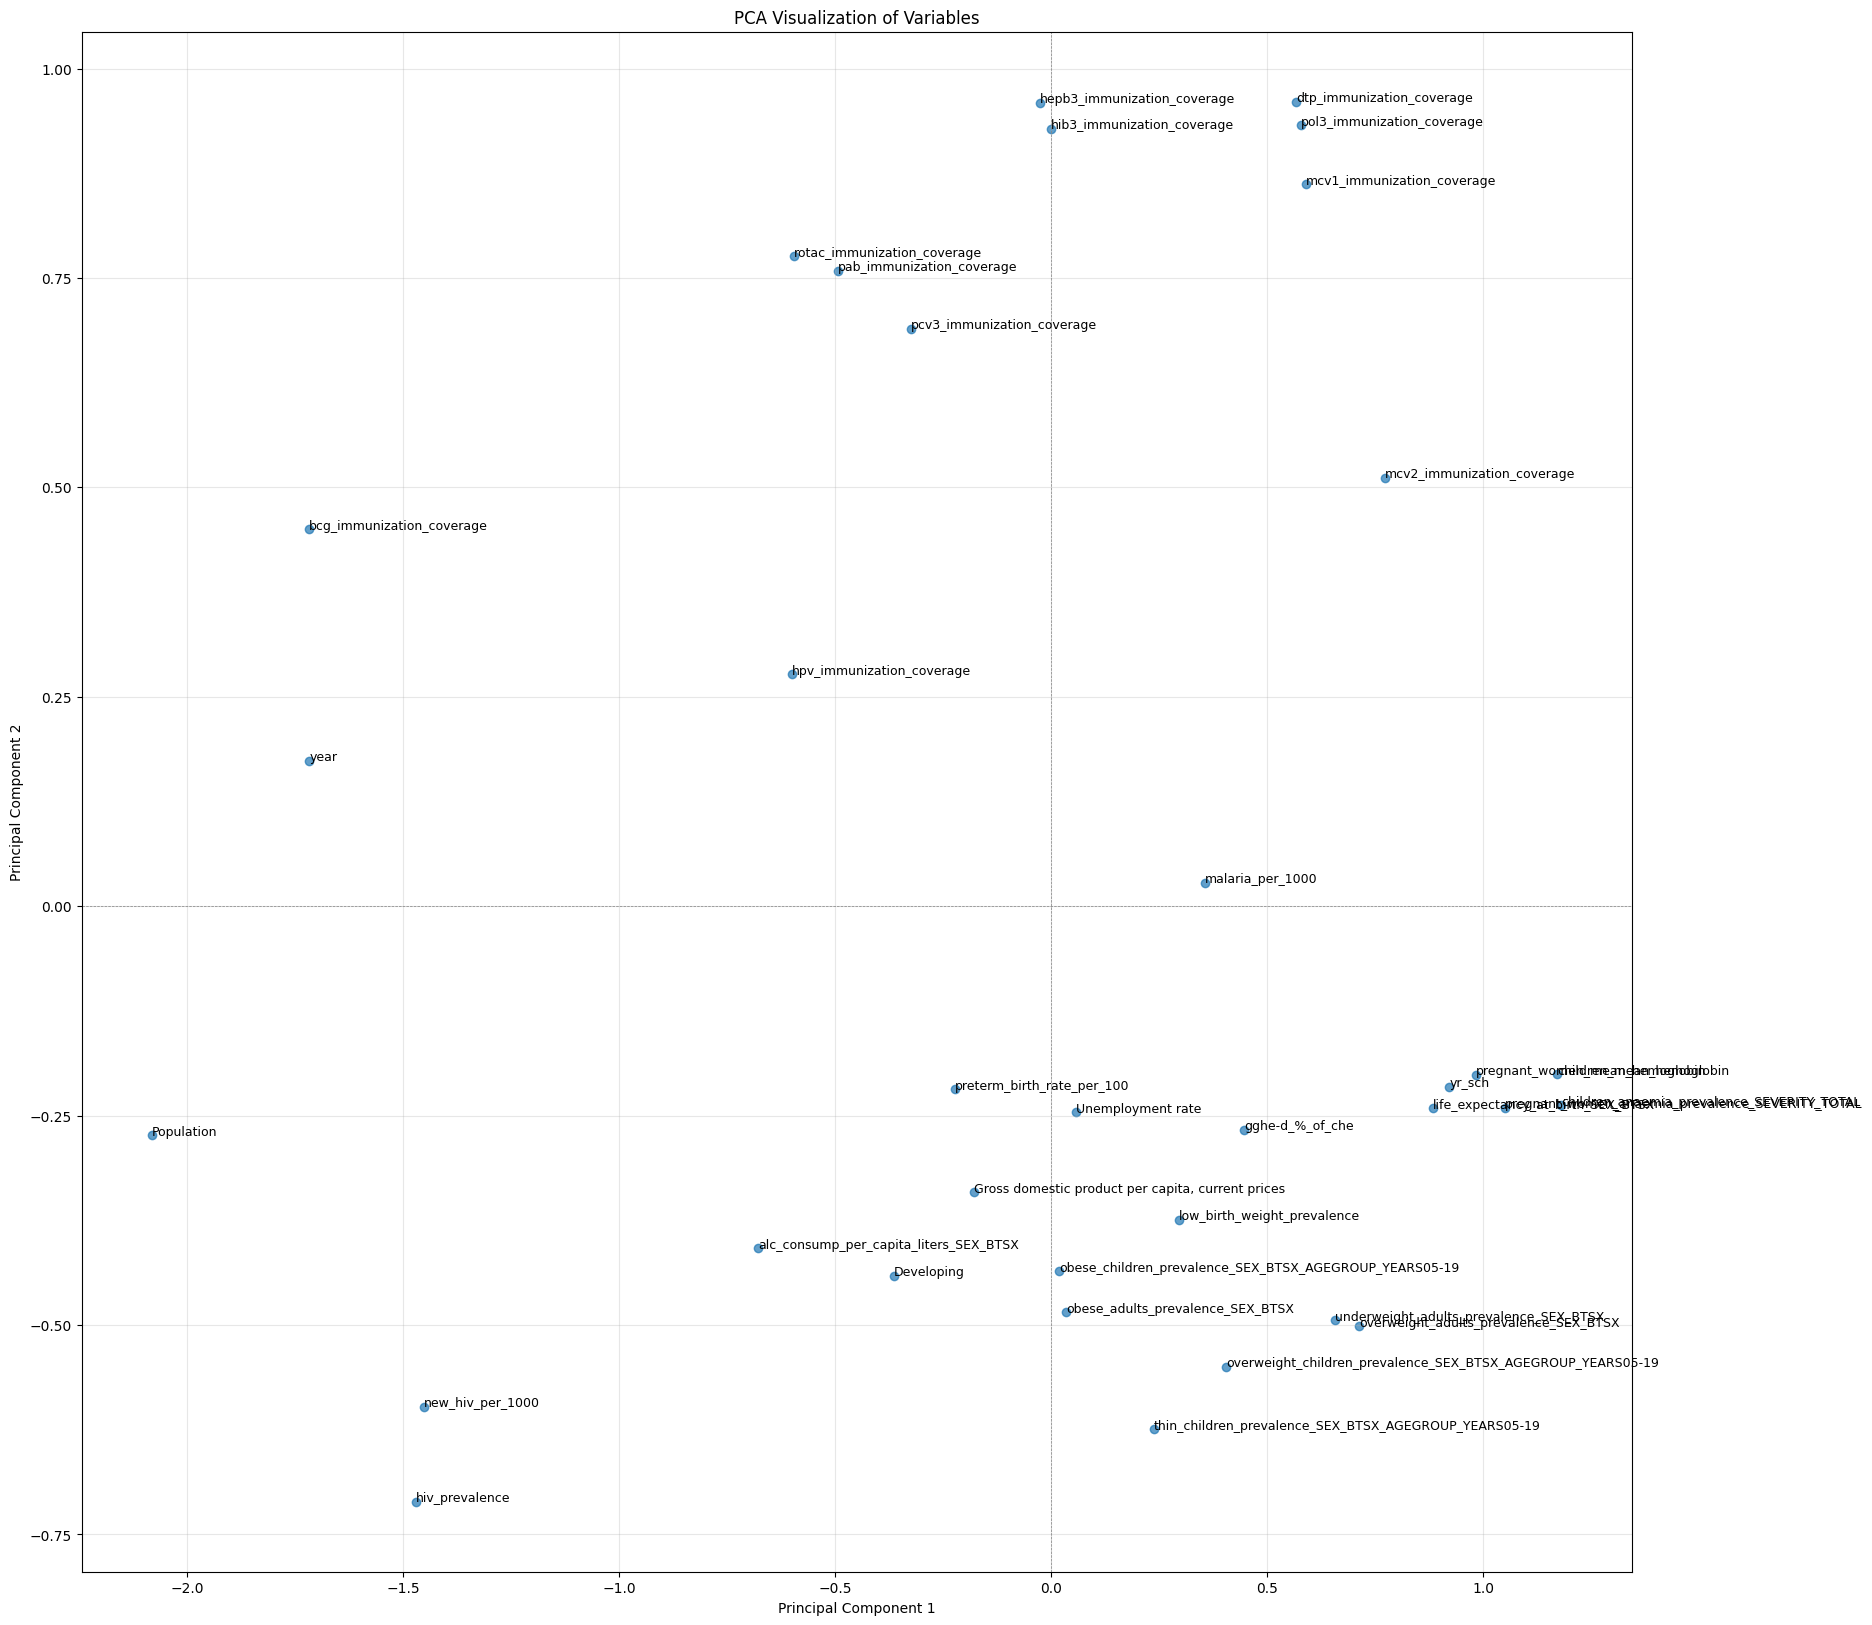

In [5]:
numeric_df = df_filtered.select_dtypes(include=['number'])

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 2: Handle missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Step 3: Compute the correlation matrix
correlation_matrix = np.abs(np.corrcoef(imputed_data, rowvar=False))

# Step 4: Perform PCA on the correlation matrix
pca = PCA()
pca.fit(correlation_matrix)

# Step 6: Project the data onto the first two principal components
pca_result = pca.transform(correlation_matrix)
pca_df = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'], index=numeric_df.columns)

# Step 7: Visualize the PCA results
plt.figure(figsize=(20, 20))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
for i, label in enumerate(pca_df.index):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], label, fontsize=9)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Variables')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.show()

### Weighted average
Took weighted average of all immunization rates, weighted by coefficient of determination

In [6]:
# Example: assuming `df` is your DataFrame
immunization_cols = [col for col in df_filtered.columns if 'immunization' in col]

# Compute R² values
r_squared_values = {}
for col in immunization_cols:
    # Drop rows with null values in the immunization column or life_expectancy
    valid_data = df_filtered.loc[:, [col, 'life_expectancy_at_birth_SEX_BTSX']].dropna()
    X = valid_data.loc[:, [col]]  # Immunization values
    y = valid_data.loc[:, 'life_expectancy_at_birth_SEX_BTSX']  # Life expectancy values
    
    if len(X) > 1:  # Ensure enough data points for regression
        model = LinearRegression()
        model.fit(X, y)
        r_squared_values[col] = model.score(X, y)
    else:
        r_squared_values[col] = 0  # Assign R² as 0 if not enough data

# Normalize R² values to compute weights
total_r_squared = sum(r_squared_values.values())
if total_r_squared > 0:
    weights = {col: r / total_r_squared for col, r in r_squared_values.items()}
else:
    weights = {col: 0 for col in immunization_cols}  # Handle edge case

# Compute weighted average
def compute_weighted_avg(row):
    weighted_sum = 0
    total_weight = 0
    for col in immunization_cols:
        if not np.isnan(row[col]):  # Ignore null values
            weighted_sum += row[col] * weights[col]
            total_weight += weights[col]
    return weighted_sum if total_weight > 0 else np.nan

# Compute the weighted average and assign it
df_filtered['immunization_weighted_avg'] = df_filtered.apply(compute_weighted_avg, axis=1)

# Drop the original immunization columns
df_filtered = df_filtered.drop(columns=immunization_cols)

df_filtered.head()

,ISO,country,year,yr_sch,"Gross domestic product per capita, current prices",Unemployment rate,Population,Developing,life_expectancy_at_birth_SEX_BTSX,hiv_prevalence,...,pregnant_women_mean_hemoglobin,children_anaemia_prevalence_SEVERITY_TOTAL,children_mean_hemoglobin,thin_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19,overweight_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19,obese_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19,underweight_adults_prevalence_SEX_BTSX,overweight_adults_prevalence_SEX_BTSX,obese_adults_prevalence_SEX_BTSX,immunization_weighted_avg
0,AND,Andorra,2000,NaN,NaN,NaN,NaN,0,NaN,NaN,...,120.0,13.1,122.0,2.08107,26.58455,8.65738,2.33471,48.91428,14.57424,67.808139
1,AND,Andorra,2001,NaN,NaN,NaN,NaN,0,NaN,NaN,...,120.0,12.9,122.0,2.06160,27.05039,8.94262,2.30707,49.39171,14.98061,67.606571
2,AND,Andorra,2002,NaN,NaN,NaN,NaN,0,NaN,NaN,...,120.0,12.7,122.0,2.03899,27.45915,9.20718,2.31059,49.57156,15.26287,67.982400
3,AND,Andorra,2003,NaN,NaN,NaN,NaN,0,NaN,NaN,...,120.0,12.6,122.0,2.01490,27.89674,9.49335,2.30555,49.79273,15.55417,68.471749
4,AND,Andorra,2004,NaN,NaN,NaN,NaN,0,NaN,NaN,...,120.0,12.6,122.0,1.99291,28.35393,9.79709,2.29094,50.05269,15.85633,68.946319


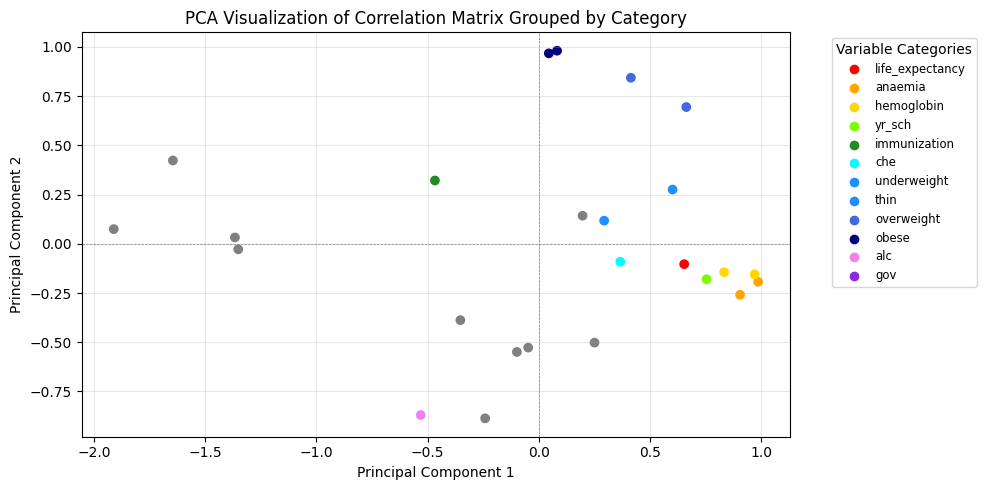

In [7]:
numeric_df = df_filtered.select_dtypes(include=['number'])

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 2: Handle missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Step 3: Compute the correlation matrix
correlation_matrix = np.abs(np.corrcoef(imputed_data, rowvar=False))

# Step 4: Perform PCA on the correlation matrix
pca = PCA()
pca.fit(correlation_matrix)

# Step 6: Project the data onto the first two principal components
pca_result = pca.transform(correlation_matrix)
pca_df = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'], index=numeric_df.columns)

# Define color mapping based on column name text
color_mapping = {
    'life_expectancy': 'red',
    'anaemia': 'orange',
    'hemoglobin': 'gold',
    'yr_sch': 'lawngreen',
    'immunization': 'forestgreen',
    'che': 'aqua',
    'underweight': 'dodgerblue',
    'thin': 'dodgerblue',
    'overweight': 'royalblue',
    'obese': 'navy',
    'alc': 'violet',
    'gov': 'blueviolet'
}

# Assign colors to each column based on the mapping
def assign_color(column_name):
    for key, color in color_mapping.items():
        if key in column_name:
            return color
    return 'gray'  # Default color for columns not matching any criteria

colors = [assign_color(col) for col in numeric_df.columns]

# Visualize the PCA results without marker labels
plt.figure(figsize=(10, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors)

# Add legend
for label, color in color_mapping.items():
    plt.scatter([], [], c=color, label=label)
plt.legend(title="Variable Categories", loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')

# Plot aesthetics
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Correlation Matrix Grouped by Category')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Feature selection
- Selecting columns by naively choosing one from common groups
- Removed malaria per 1000 bc non existent in developed countries
- Keeping unemployment rate despite large amount of missing data
- naively removing adults weights to simplify analysis

In [8]:
df_filtered = df_filtered[[
       'ISO',
       'year', 
       'yr_sch', 
       'Gross domestic product per capita, current prices',
       'Unemployment rate', 
       'Developing', 
       'life_expectancy_at_birth_SEX_BTSX', 
       'immunization_weighted_avg',
       'hiv_prevalence',
       'gghe-d_%_of_che', 
       'alc_consump_per_capita_liters_SEX_BTSX',
       'low_birth_weight_prevalence',
       'pregnant_women_anaemia_prevalence_SEVERITY_TOTAL',
       'pregnant_women_mean_hemoglobin',
       'thin_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19',
       'overweight_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19',
       'obese_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19']].copy()

/var/folders/97/23ltc4v96g31pp78_gyv6dvm0000gn/T/ipykernel_42572/3649936784.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(pca_df['PC1'][i], pca_df['PC2'][i], label, fontsize=9)


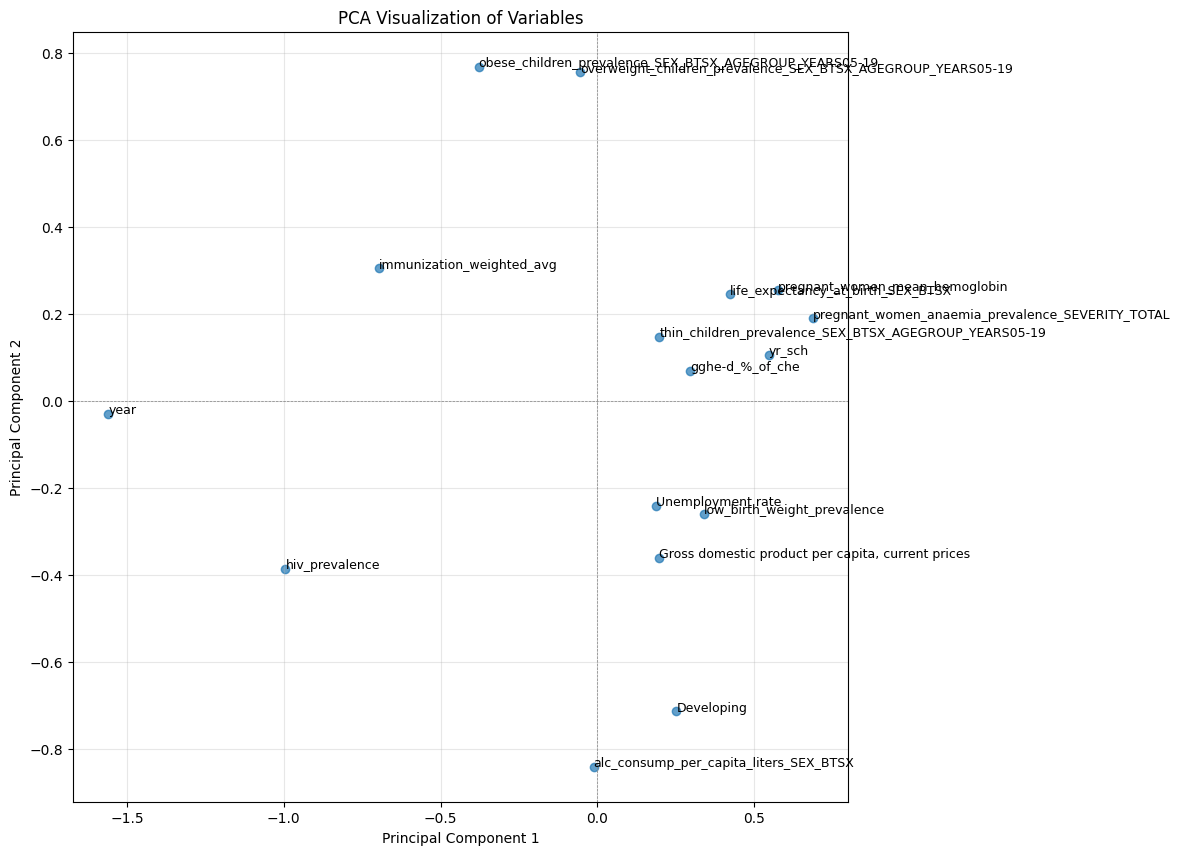

In [9]:
numeric_df = df_filtered.select_dtypes(include=['number'])

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 2: Handle missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Step 3: Compute the correlation matrix
correlation_matrix = np.abs(np.corrcoef(imputed_data, rowvar=False))

# Step 4: Perform PCA on the correlation matrix
pca = PCA()
pca.fit(correlation_matrix)

# Step 6: Project the data onto the first two principal components
pca_result = pca.transform(correlation_matrix)
pca_df = pd.DataFrame(pca_result[:, :2], columns=['PC1', 'PC2'], index=numeric_df.columns)

# Step 7: Visualize the PCA results
plt.figure(figsize=(10, 10))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
for i, label in enumerate(pca_df.index):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], label, fontsize=9)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Variables')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.show()

In [10]:
df_filtered.rename(columns={'ISO': 'iso',
                    'Gross domestic product per capita, current prices': 'gdp_per_capita',
                    'Unemployment rate': 'unemployment_rate', 
                    'Developing': 'developing',
                    'life_expectancy_at_birth_SEX_BTSX': 'life_expectancy',
                    'alc_consump_per_capita_liters_SEX_BTSX': 'alc_consump_per_capita',
                    'pregnant_women_anaemia_prevalence_SEVERITY_TOTAL': 'pregnant_anaemia_prevalence',
                    'pregnant_women_mean_hemoglobin': 'pregnant_mean_hemoglobin',
                    'thin_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19': 'thin_child_prevalence',
                    'overweight_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19': 'overweight_child_prevalence',
                    'obese_children_prevalence_SEX_BTSX_AGEGROUP_YEARS05-19': 'obese_child_prevalence'}, inplace=True)

In [11]:
df_filtered.to_excel("master_filtered.xlsx")